In [1]:
import numpy as np
import pandas as pd
df_ads = pd.read_csv('./dataset/advertising.csv')
df_ads.head()

,wechat,weibo,others,sales
0,304.4,93.6,294.4,9.7
1,1011.9,34.4,398.4,16.7
2,1091.1,32.8,295.2,17.3
3,85.5,173.6,403.2,7.0
4,1047.0,302.4,553.6,22.1


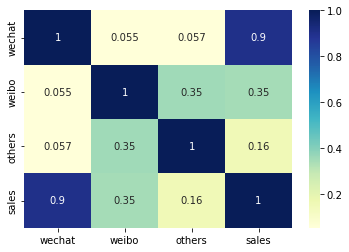

In [3]:
# 导入数据可视化所需要的库
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df_ads.corr(), cmap='YlGnBu', annot=True)
plt.show()

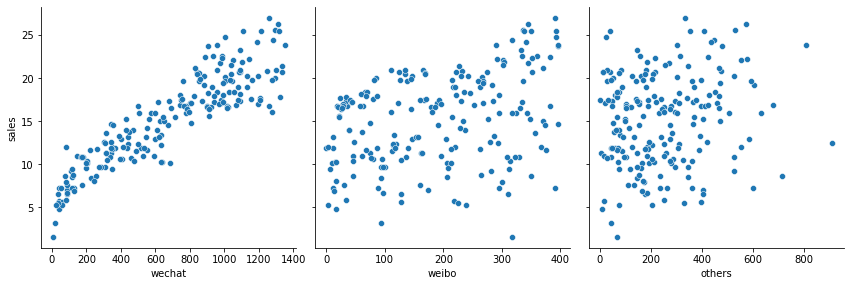

In [5]:
# 显示销量和各种广告投放量的散点图。
sns.pairplot(df_ads, x_vars=['wechat', 'weibo', 'others'],
                            y_vars='sales', height=4, aspect=1, kind='scatter')   
plt.show()   

In [6]:
X = np.array(df_ads.wechat)
y = np.array(df_ads.sales)
print("张量X的阶：", X.ndim)
print("张量X的形状：", X.shape)
print(X)

张量X的阶： 1
张量X的形状： (200,)
[ 304.4 1011.9 1091.1   85.5 1047.   940.9 1277.2   38.2  342.6  347.6
  980.1   39.1   39.6  889.1  633.8  527.8  203.4  499.6  633.4  437.7
  334.  1132.   841.3  435.4  627.4  599.2  321.2  571.9  758.9  799.4
  314.   108.3  339.9  619.7  227.5  347.2  774.4 1003.3   60.1   88.3
 1280.4  743.9  805.4  905.    76.9 1088.8  670.2  513.7 1067.    89.2
  130.1  113.8  195.7 1000.1  283.5 1245.3  681.1  341.7  743.   976.9
 1308.6  953.7 1196.2  488.7 1027.4  830.8  984.6  143.3 1092.5  993.7
 1290.4  638.4  355.8  854.5    3.2  615.2   53.2  401.8 1348.6   78.3
 1188.9 1206.7  899.1  364.9  854.9 1099.7  909.1 1293.6  311.2  411.3
  881.3 1091.5   18.7  921.4 1214.4 1038.8  427.2  116.5  879.1  971.
  899.1  114.2   78.3   59.6  748.5  681.6  261.6 1083.8 1322.7  753.5
 1259.9 1080.2   33.2  909.1 1092.5 1208.5  766.2  467.3  611.1  202.5
   24.6  442.3 1301.3  314.9  634.7  408.1  560.1  503.7 1154.8 1130.2
  932.8  958.7 1044.2 1274.9  550.6 1259.   196.1  548

In [8]:
# X = X.reshape((len(X), 1))
# y = y.reshape((len(X), 1))

# 也可以利用索引-1，通过reshape函数把向量转换为矩阵
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

print("张量X的形状：", X.shape)
print(X)

张量X的形状： (200, 1)
[[ 304.4]
 [1011.9]
 [1091.1]
 [  85.5]
 [1047. ]
 [ 940.9]
 [1277.2]
 [  38.2]
 [ 342.6]
 [ 347.6]
 [ 980.1]
 [  39.1]
 [  39.6]
 [ 889.1]
 [ 633.8]
 [ 527.8]
 [ 203.4]
 [ 499.6]
 [ 633.4]
 [ 437.7]
 [ 334. ]
 [1132. ]
 [ 841.3]
 [ 435.4]
 [ 627.4]
 [ 599.2]
 [ 321.2]
 [ 571.9]
 [ 758.9]
 [ 799.4]
 [ 314. ]
 [ 108.3]
 [ 339.9]
 [ 619.7]
 [ 227.5]
 [ 347.2]
 [ 774.4]
 [1003.3]
 [  60.1]
 [  88.3]
 [1280.4]
 [ 743.9]
 [ 805.4]
 [ 905. ]
 [  76.9]
 [1088.8]
 [ 670.2]
 [ 513.7]
 [1067. ]
 [  89.2]
 [ 130.1]
 [ 113.8]
 [ 195.7]
 [1000.1]
 [ 283.5]
 [1245.3]
 [ 681.1]
 [ 341.7]
 [ 743. ]
 [ 976.9]
 [1308.6]
 [ 953.7]
 [1196.2]
 [ 488.7]
 [1027.4]
 [ 830.8]
 [ 984.6]
 [ 143.3]
 [1092.5]
 [ 993.7]
 [1290.4]
 [ 638.4]
 [ 355.8]
 [ 854.5]
 [   3.2]
 [ 615.2]
 [  53.2]
 [ 401.8]
 [1348.6]
 [  78.3]
 [1188.9]
 [1206.7]
 [ 899.1]
 [ 364.9]
 [ 854.9]
 [1099.7]
 [ 909.1]
 [1293.6]
 [ 311.2]
 [ 411.3]
 [ 881.3]
 [1091.5]
 [  18.7]
 [ 921.4]
 [1214.4]
 [1038.8]
 [ 427.2]
 [ 116.5]
 [ 

In [9]:
# 将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2, random_state=0)

In [10]:
# 归一化
def range_0_1(data_train, data_test):
    min = data_train.min(axis=0)
    max = data_train.max(axis=0)
    gap = max - min
    data_train -= min
    data_train /= gap
    data_test -= min
    data_test /= gap
    return data_train, data_test

In [11]:
X_train, X_test = range_0_1(X_train, X_test)
y_train, y_test = range_0_1(y_train, y_test)

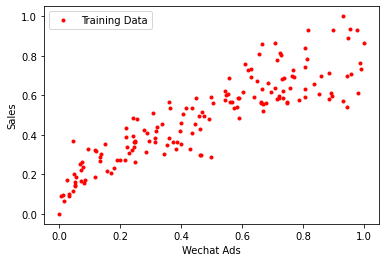

In [12]:
plt.plot(X_train, y_train, 'r.', label='Training Data')
plt.xlabel('Wechat Ads')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
print('销量的真值（测试集）：', y_test)
print('销量的预测值（测试集）：', y_pred)
print('线性回归预测评分：', model.score(X_test, y_test))

销量的真值（测试集）： [[ 0.37815126]
 [ 0.90336134]
 [ 0.73529412]
 [ 0.71428571]
 [ 0.14285714]
 [ 0.76890756]
 [ 0.58823529]
 [ 0.79831933]
 [ 0.16806723]
 [ 0.63865546]
 [ 0.74369748]
 [ 0.31092437]
 [ 0.45378151]
 [ 0.65966387]
 [ 0.88235294]
 [ 0.10504202]
 [ 0.42016807]
 [ 0.81512605]
 [ 0.71008403]
 [-0.06722689]
 [ 0.51680672]
 [ 0.56302521]
 [ 0.73529412]
 [ 0.31932773]
 [ 0.96638655]
 [ 0.34033613]
 [ 0.55462185]
 [ 0.31512605]
 [ 0.74369748]
 [ 0.23109244]
 [ 0.28991597]
 [ 0.7394958 ]
 [ 0.39495798]
 [ 0.60084034]
 [ 0.73529412]
 [ 0.70168067]
 [ 0.71428571]
 [ 0.79411765]
 [ 0.36554622]
 [ 0.36134454]]
销量的预测值（测试集）： [[0.47947693]
 [0.66283604]
 [0.70328437]
 [0.60156726]
 [0.18237553]
 [0.68022783]
 [0.63227619]
 [0.73200566]
 [0.18441286]
 [0.68952001]
 [0.63863661]
 [0.36752352]
 [0.37771013]
 [0.7014955 ]
 [0.75550942]
 [0.18371719]
 [0.47266929]
 [0.62825123]
 [0.66328326]
 [0.1663254 ]
 [0.51878236]
 [0.6711841 ]
 [0.70576891]
 [0.24816617]
 [0.81498932]
 [0.32121168]
 [0.554758

In [15]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("线性回归预测评分：", model.score(X_test, y_test)) #评估预测结果

线性回归预测评分： 0.832199701556618
